In [1]:
import pandas as pd

# Data Preprocessing

## Data Scraping

### IMDB 2000-2024 movies

Original scraped data

In [62]:
data = pd.read_csv(r'C:\Users\Thibaut\Documents\SIMPLON\DEV-IA\BOXOFFICE\scraping\data\imdb_movies.csv')
data.shape

(6733, 21)

In [24]:
data.columns

Index(['movie_boxoffice', 'movie_budget', 'movie_cast', 'movie_categories',
       'movie_countries', 'movie_director', 'movie_id', 'movie_imdb_metascore',
       'movie_imdb_nb_of_ratings', 'movie_imdb_popularity',
       'movie_imdb_rating', 'movie_length', 'movie_original_title',
       'movie_poster', 'movie_production_companies', 'movie_synopsis',
       'movie_title', 'movie_url', 'movie_us_boxoffice', 'release_date',
       'year'],
      dtype='object')

Keep only movies with a poster & a category

In [88]:
movies = data.copy()
movies = movies.query('movie_poster.isna() == False and movie_categories.isna() == False')
movies.shape 

(6009, 21)

In [89]:
pd.set_option('display.max_columns', None)
movies.sample(1)

,movie_boxoffice,movie_budget,movie_cast,movie_categories,movie_countries,movie_director,movie_id,movie_imdb_metascore,movie_imdb_nb_of_ratings,movie_imdb_popularity,movie_imdb_rating,movie_length,movie_original_title,movie_poster,movie_production_companies,movie_synopsis,movie_title,movie_url,movie_us_boxoffice,release_date,year
4268,3908035.0,9780000.0,Benoît Magimel|Albert Dupontel|Aurélien Recoin...,Drame|Historique|Guerre,France|Maroc,Florent-Emilio Siri,tt0825248,61.0,35000.0,NaN,6.9,111.0,NaN,https://m.media-amazon.com/images/M/MV5BMzhiYz...,Les Films du Kiosque|SND Films|France 2 Cinéma,"En Kabylie, Terrien prend le commandement d'un...",L'Ennemi Intime,https://www.imdb.com/title/tt0825248/,NaN,03-10-2007,2007.0


### IMDB Upcoming movies (2024-2025)

##### First upcoming movies scraping (don't remember the date, probably March 24th)

In [21]:
upcoming_movies = pd.read_csv(r'C:\Users\Thibaut\Documents\SIMPLON\DEV-IA\BOXOFFICE\scraping\data\upcomingmovies_march24.csv')
upcoming_movies['release_date'] = pd.to_datetime(upcoming_movies['release_date'], format='%d-%m-%Y')
upcoming_movies = upcoming_movies.sort_values(by="release_date", ascending=True)
upcoming_movies.columns

Index(['movie_boxoffice', 'movie_budget', 'movie_cast', 'movie_categories',
       'movie_countries', 'movie_director', 'movie_id', 'movie_imdb_metascore',
       'movie_imdb_nb_of_ratings', 'movie_imdb_popularity',
       'movie_imdb_rating', 'movie_length', 'movie_original_title',
       'movie_production_companies', 'movie_synopsis', 'movie_title',
       'movie_url', 'movie_us_boxoffice', 'release_date'],
      dtype='object')

##### Second scraping of upcoming movies : April 6

In [65]:
upcoming_movies2 = pd.read_csv(r'C:\Users\Thibaut\Documents\SIMPLON\DEV-IA\BOXOFFICE\scraping\data\upcomingmovies_april6.csv')
# upcoming_movies2['release_date'] = pd.to_datetime(upcoming_movies2['release_date'], format='%d-%m-%Y')
# upcoming_movies2 = upcoming_movies2.sort_values(by="release_date", ascending=True)
upcoming_movies2

,movie_boxoffice,movie_budget,movie_cast,movie_categories,movie_countries,movie_director,movie_id,movie_imdb_metascore,movie_imdb_nb_of_ratings,movie_imdb_popularity,movie_imdb_rating,movie_length,movie_original_title,movie_poster,movie_production_companies,movie_synopsis,movie_title,movie_url,movie_us_boxoffice,release_date
0,NaN,NaN,"Daniel Berlioux, Oussem Kadri, Majida Ghomari,...","Biographique, Drame",France,Cheyenne Carron,tt29478506,NaN,NaN,NaN,NaN,108.0,Que Notre Joie Demeure,https://m.media-amazon.com/images/M/MV5BMmY2Ym...,Hésiode Productions,"Father Jacques Hamel and Adel Kermiche, two de...",Que Notre Joie Demeure,https://www.imdb.com/title/tt29478506/?ref_=rlm,NaN,24-04-2024
1,NaN,NaN,"Tergel Bold-Erdene, Nomin-Erdene Ariunbyamba, ...",Drame,"Qatar, Allemagne, Pays-Bas, Portugal, Mongolie...",Lkhagvadulam Purev-Ochir,tt27816866,NaN,140.0,NaN,6.9,104.0,Ser Ser Salhi,NaN,"27 Films Production, Aurora Films, Guru Media","Ze, a 17-year-old, studies hard at school to s...",Un Jeune Chaman,https://www.imdb.com/title/tt27816866/?ref_=rlm,NaN,24-04-2024
2,114426978.0,100000000.0,"Paul Rudd, Carrie Coon, Finn Wolfhard, Mckenna...","Aventure, Comédie, Fantastique","États-Unis, Canada, Royaume-Uni",Gil Kenan,tt21235248,46.0,20000.0,4.0,6.5,115.0,Ghostbusters: Frozen Empire,https://m.media-amazon.com/images/M/MV5BNGE5MW...,"Columbia Pictures, BRON Studios, Ghostcorps",Lorsque la découverte d'un ancien artefact lib...,S.O.S. Fantômes: La Menace De Glace,https://www.imdb.com/title/tt21235248/?ref_=rlm,79863665.0,10-04-2024
3,NaN,NaN,"Ido Tako, Mika Reiss, Efrat Ben Tzur, Tikva Da...","Drame, Thriller, Guerre",Israël,Dani Rosenberg,tt27817584,NaN,98.0,NaN,6.8,105.0,The Vanishing Soldier,https://m.media-amazon.com/images/M/MV5BNGQ1Yz...,"Israel Film Fund, United Channel Movies",Eighteen-year-old Israeli soldier flees back t...,Le Déserteur,https://www.imdb.com/title/tt27817584/?ref_=rlm,NaN,24-04-2024
4,NaN,NaN,"Noée Abita, Anders Danielsen Lie, Alexis Neise...",Drame,France,Victoria Musiedlak,tt26218928,NaN,32.0,NaN,6.0,98.0,NaN,NaN,"Ligne 2, France 2 Cinéma, Canal+",An inexperienced criminal defense lawyer is ch...,Première Affaire,https://www.imdb.com/title/tt26218928/?ref_=rlm,NaN,24-04-2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,64120.0,NaN,"Karin Anglin, Clé Bennett, John Eric Bentley, ...","Animation, Action, Aventure",Hongrie,Áron Gauder,tt11736638,NaN,414.0,NaN,7.3,103.0,Kojot Négy Lelke,https://m.media-amazon.com/images/M/MV5BOTYyNW...,Cinemon Entertainment,Native American protesters confront an oil pip...,Les 4 Âmes Du Coyote,https://www.imdb.com/title/tt11736638/?ref_=rlm,NaN,10-04-2024
120,NaN,NaN,"Nell Tiger Free, Ralph Ineson, Sonia Braga, Ta...",Horreur,"États-Unis, Italie, Royaume-Uni, Canada, Serbie",Arkasha Stevenson,tt5672290,64.0,19000.0,65.0,7.0,120.0,The First Omen,https://m.media-amazon.com/images/M/MV5BNWZkMm...,"20th Century Studios, Phantom Four Films, Abbe...",Une jeune Américaine est envoyée à Rome pour c...,La Malédiction: L'Origine,https://www.imdb.com/title/tt5672290/?ref_=rlm,NaN,10-04-2024
121,NaN,NaN,NaN,Documentaire,France,Nicolas Philibert,tt31831104,NaN,NaN,NaN,NaN,72.0,NaN,https://m.media-amazon.com/images/M/MV5BOGE0OD...,TS Productions,NaN,La Machine À Écrire Et Autres Sources De Tracas,https://www.imdb.com/title/tt31831104/?ref_=rlm,NaN,17-04-2024
122,488140.0,100000.0,"Alan Nehama, Dutch Welch, Aliya Campbell, Dona...",Drame,"Mexique, États-Unis",Michel Franco,tt19864828,71.0,32000.0,936.0,6.6,103.0,NaN,https://m.media-amazon.com/images/M/MV5BODY0OW...,"High Frequency Entertainment, Teorema, Case St...",Sylvia est une assistante sociale qui mène une...,Memory,https://www.imdb.com/title/tt19864828/?ref_=rlm,381052.0,29-05-2024


### IMDB Oscars

Original scraped data

In [9]:
oscars = pd.read_csv(r"C:\Users\Thibaut\Documents\SIMPLON\DEV-IA\BOXOFFICE\scraping\data\imdb_oscars.csv")
oscars.shape

(25, 4)

In [10]:
oscars = oscars[['categories', 'winners', 'year']]
oscars.sample(1)

,categories,winners,year
14,"'Best Motion Picture of the Year', 'Best Perfo...","['The Kings Speech', 'Colin Firth', 'Natalie P...",2011


In [11]:
# Supprimer les crochets "[" et "]" des colonnes categories et winners
oscars['categories'] = oscars['categories'].str.replace(r"[", "").str.replace(r"'", "")
oscars['winners'] = oscars['winners'].str.replace(r"[", "").str.replace(r"'", "")
# Nettoyage des chaînes en supprimant les guillemets simples et les espaces autour des chaînes
oscars['categories'] = oscars['categories'].str.strip("'").str.strip()
oscars['winners'] = oscars['winners'].str.strip("'").str.strip()
# # Diviser les valeurs de chaque colonne en une liste
oscars['category'] = oscars['categories'].str.split(', ')
oscars['winner'] = oscars['winners'].str.split(', ')

data_list = [(cat, win, year) for cat_list, win_list, year in zip(oscars['category'], oscars['winner'], oscars['year']) for cat, win in zip(cat_list, win_list)]
oscars_data = pd.DataFrame(data_list, columns=['category', 'winner', 'year'])
oscars_data.to_csv('oscars.csv', index=False)
oscars_data 

,category,winner,year
0,Best Picture,A Beautiful Mind,2002
1,Best Actor in a Leading Role,Denzel Washington,2002
2,Best Actress in a Leading Role,Halle Berry,2002
3,Best Actor in a Supporting Role,Jim Broadbent,2002
4,Best Actress in a Supporting Role,Jennifer Connelly,2002
...,...,...,...
694,Best Animated Feature Film,The Boy and the Heron,2024
695,Best Animated Short Film,War Is Over!,2024
696,Best Live Action Short Film,The Wonderful Story of Henry Sugar,2024
697,Best Documentary Short Film,The Last Repair Shop,2024


### Allociné TARGET Box Office Week 1

In [16]:
import pandas as pd
import requests
import time
from datetime import date, timedelta
from io import StringIO 
from fake_useragent import UserAgent

# Generate a random user-agent
ua = UserAgent()
headers = {'User-Agent': ua.random}

# Date de départ
start_date = date(2024, 3, 27)
urls = [f"https://www.allocine.fr/boxoffice/france/sem-{(start_date - timedelta(days=7*i)).strftime('%Y-%m-%d')}/" for i in range(2000)]

target_df = pd.DataFrame()

# Boucle sur chaque URL
for url in urls:
    # Utiliser requests pour obtenir le contenu HTML
    with requests.Session() as s:
        s.headers.update(headers)
        response = s.get(url)
        if response.status_code == 200:
            # Pause pour simuler une navigation humaine
            time.sleep(1)
            # Utiliser StringIO pour encapsuler le contenu HTML
            html_content = StringIO(response.text)
            # Utiliser pandas pour lire le tableau
            tables = pd.read_html(html_content)
            # Supposons que le tableau qui vous intéresse est le premier
            table = tables[0]
            # Filtrer ou nettoyer le tableau au besoin
            table = table.query('Semaine == 1') 
            # Ajouter le tableau à notre DataFrame principal
            target_df = pd.concat([target_df, table], ignore_index=True)
            
target_df = target_df.rename(columns={'Unnamed: 0': 'Titre'})
target_df = target_df[['Titre', 'Entrées']]
target_df

,Titre,Entrées
0,1 Kung Fu Panda 4 Universal Pictures Internati...,825 898
1,3 La Promesse verte Diaphana Distribution Band...,176 281
2,4 Pas de vagues Ad Vitam Bande-annonce,170 817
3,6 Le Jeu de la reine ARP Sélection Bande-annonce,106 872
4,4 Immaculée Metropolitan FilmExport Bande-annonce,129 796
...,...,...
3791,6 Le Masque de Zorro Bande-annonce,226 753
3792,7 Il faut sauver le soldat Ryan United Interna...,165 808
3793,8 Alice et Martin Bac Films Bande-annonce,118 215
3794,"9 The X Files, le film UFD Bande-annonce",100 301


## Final Data Cleaning

In [90]:
def get_matching_values(movie_title):
    matching_values = target_df[target_df['Titre'].str.contains(movie_title)]['Entrées']
    if not matching_values.empty:
        if len(matching_values) < 1:
            return ' '.join(map(str, matching_values))
        else:
            return matching_values.iloc[0]
    else:
        return None
movies_data = movies.copy()
# Appliquer la fonction pour chaque titre de film de df1
movies_data['total_tickets_sold_on_week1'] = movies_data['movie_title'].apply(get_matching_values)
movies_data

C:\Users\Thibaut\AppData\Local\Temp\ipykernel_15652\460538429.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matching_values = target_df[target_df['Titre'].str.contains(movie_title)]['Entrées']


,movie_boxoffice,movie_budget,movie_cast,movie_categories,movie_countries,movie_director,movie_id,movie_imdb_metascore,movie_imdb_nb_of_ratings,movie_imdb_popularity,movie_imdb_rating,movie_length,movie_original_title,movie_poster,movie_production_companies,movie_synopsis,movie_title,movie_url,movie_us_boxoffice,release_date,year,total_tickets_sold_on_week1
0,11208527.0,NaN,Lily Bird|Nicolas Cage|Julianne Nicholson|Jess...,Comédie|Horreur,États-Unis,Kristoffer Borgli,tt21942866,74.0,51000.0,47.0,7.0,102.0,NaN,https://m.media-amazon.com/images/M/MV5BYjA3Yj...,A24|Square Peg,Un père de famille infortuné voit sa vie boule...,Dream Scenario,https://www.imdb.com/title/tt21942866/,5742193.0,27-12-2023,2023.0,None
1,221026368.0,200000000.0,Joaquin Phoenix|Vanessa Kirby|Tahar Rahim|Rupe...,Action|Aventure|Biographique,États-Unis|Royaume-Uni,Ridley Scott,tt13287846,64.0,134000.0,72.0,6.4,158.0,Napoleon,https://m.media-amazon.com/images/M/MV5BMTI2Zj...,Apple Studios|Moving Picture Company (MPC)|Sco...,Offre un aperçu personnel des origines de Napo...,Napoléon,https://www.imdb.com/title/tt13287846/,61524375.0,22-11-2023,2023.0,764 419
2,45229548.0,NaN,Anthony Hopkins|Lena Olin|Johnny Flynn|Helena ...,Biographique|Drame|Historique,Royaume-Uni,James Hawes,tt13097932,69.0,14000.0,66.0,7.6,109.0,One Life,https://m.media-amazon.com/images/M/MV5BZWIxZD...,See-Saw Films|MBK Productions|BBC Film,Le film suit l'humanitaire britannique Nichola...,Une Vie,https://www.imdb.com/title/tt13097932/,4853486.0,21-02-2024,2023.0,439 255
3,567535383.0,291000000.0,Tom Cruise|Hayley Atwell|Ving Rhames|Simon Peg...,Action|Aventure|Thriller,États-Unis,Christopher McQuarrie,tt9603212,81.0,244000.0,100.0,7.7,163.0,Mission: Impossible - Dead Reckoning Part One,https://m.media-amazon.com/images/M/MV5BOGMxNW...,Paramount Pictures|Skydance Media|TC Productions,"Une clef, déverrouillant un immense pouvoir, e...","Mission : Impossible - Dead Reckoning, Partie 1",https://www.imdb.com/title/tt9603212/,172135383.0,12-07-2023,2023.0,None
4,157026901.0,200000000.0,Leonardo DiCaprio|Robert De Niro|Lily Gladston...,Policier|Drame|Historique,États-Unis,Martin Scorsese,tt5537002,89.0,233000.0,53.0,7.6,206.0,NaN,https://m.media-amazon.com/images/M/MV5BMzI4Mm...,Apple Studios|Imperative Entertainment|Sikelia...,Des membres de la tribu Osage aux États-Unis s...,Killers Of The Flower Moon,https://www.imdb.com/title/tt5537002/,68026901.0,18-10-2023,2023.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,NaN,NaN,René Collombat|Alix Bénézech|Serge Papagalli|I...,Comédie,France,Jean-Loup Martin,tt19798308,NaN,NaN,NaN,NaN,98.0,NaN,https://m.media-amazon.com/images/M/MV5BYmY5YT...,Cendrane Films,NaN,Le Pied Nickelé,https://www.imdb.com/title/tt19798308/,NaN,08-06-2022,2022.0,None
6728,NaN,NaN,Mamoudou Camara|Sory Kandia Kouyaté|Amy Boiro|...,Drame,France|Guinée,Gahité Fofana,tt0817959,NaN,34.0,NaN,6.8,75.0,NaN,https://m.media-amazon.com/images/M/MV5BOTVjND...,Arte France Cinéma|Bafila Films|Key Light,"Yaguiné and Fodé, schoolboys who try in vain t...",Un Matin Bonne Heure,https://www.imdb.com/title/tt0817959/,NaN,23-11-2006,2006.0,None
6729,288128.0,NaN,Morjana Alaoui|Nadine Labaki|Hiam Abbass|Lubna...,Comédie|Drame,France|Maroc,Laïla Marrakchi,tt2524568,NaN,11000.0,NaN,6.5,100.0,NaN,https://m.media-amazon.com/images/M/MV5BM2FhNT...,Estrella Productions|Pathé|Agora Films,The whole family is reunited when Sofia comes ...,Rock The Casbah,https://www.imdb.com/title/tt2524568/,NaN,11-09-2013,2013.0,None
6731,6547983.0,10300000.0,Marion Cotillard|Louis Garrel|Alex Brendemühl|...,Drame|Romantique,France|Belgique|Canada|Espagne,Nicole Garcia,tt3794028,40.0,67000.0,NaN,6.6,120.0,NaN,https://m.media-amazon.com/images/M/MV5BN2Q2OT...,Trésor Films|StudioCanal|France 3 Cinéma,"Dans les années 1950, Gabrielle est une femme ...",Mal De Pierres,https://www.imdb.com/title/tt3794028/,47748.0,19-10-2016,2016.0,None


In [92]:
merge = pd.concat([movies_data, upcoming_movies2])
merge

,movie_boxoffice,movie_budget,movie_cast,movie_categories,movie_countries,movie_director,movie_id,movie_imdb_metascore,movie_imdb_nb_of_ratings,movie_imdb_popularity,movie_imdb_rating,movie_length,movie_original_title,movie_poster,movie_production_companies,movie_synopsis,movie_title,movie_url,movie_us_boxoffice,release_date,year,total_tickets_sold_on_week1
0,11208527.0,NaN,Lily Bird|Nicolas Cage|Julianne Nicholson|Jess...,Comédie|Horreur,États-Unis,Kristoffer Borgli,tt21942866,74.0,51000.0,47.0,7.0,102.0,NaN,https://m.media-amazon.com/images/M/MV5BYjA3Yj...,A24|Square Peg,Un père de famille infortuné voit sa vie boule...,Dream Scenario,https://www.imdb.com/title/tt21942866/,5742193.0,27-12-2023,2023.0,None
1,221026368.0,200000000.0,Joaquin Phoenix|Vanessa Kirby|Tahar Rahim|Rupe...,Action|Aventure|Biographique,États-Unis|Royaume-Uni,Ridley Scott,tt13287846,64.0,134000.0,72.0,6.4,158.0,Napoleon,https://m.media-amazon.com/images/M/MV5BMTI2Zj...,Apple Studios|Moving Picture Company (MPC)|Sco...,Offre un aperçu personnel des origines de Napo...,Napoléon,https://www.imdb.com/title/tt13287846/,61524375.0,22-11-2023,2023.0,764 419
2,45229548.0,NaN,Anthony Hopkins|Lena Olin|Johnny Flynn|Helena ...,Biographique|Drame|Historique,Royaume-Uni,James Hawes,tt13097932,69.0,14000.0,66.0,7.6,109.0,One Life,https://m.media-amazon.com/images/M/MV5BZWIxZD...,See-Saw Films|MBK Productions|BBC Film,Le film suit l'humanitaire britannique Nichola...,Une Vie,https://www.imdb.com/title/tt13097932/,4853486.0,21-02-2024,2023.0,439 255
3,567535383.0,291000000.0,Tom Cruise|Hayley Atwell|Ving Rhames|Simon Peg...,Action|Aventure|Thriller,États-Unis,Christopher McQuarrie,tt9603212,81.0,244000.0,100.0,7.7,163.0,Mission: Impossible - Dead Reckoning Part One,https://m.media-amazon.com/images/M/MV5BOGMxNW...,Paramount Pictures|Skydance Media|TC Productions,"Une clef, déverrouillant un immense pouvoir, e...","Mission : Impossible - Dead Reckoning, Partie 1",https://www.imdb.com/title/tt9603212/,172135383.0,12-07-2023,2023.0,None
4,157026901.0,200000000.0,Leonardo DiCaprio|Robert De Niro|Lily Gladston...,Policier|Drame|Historique,États-Unis,Martin Scorsese,tt5537002,89.0,233000.0,53.0,7.6,206.0,NaN,https://m.media-amazon.com/images/M/MV5BMzI4Mm...,Apple Studios|Imperative Entertainment|Sikelia...,Des membres de la tribu Osage aux États-Unis s...,Killers Of The Flower Moon,https://www.imdb.com/title/tt5537002/,68026901.0,18-10-2023,2023.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,64120.0,NaN,"Karin Anglin, Clé Bennett, John Eric Bentley, ...","Animation, Action, Aventure",Hongrie,Áron Gauder,tt11736638,NaN,414.0,NaN,7.3,103.0,Kojot Négy Lelke,https://m.media-amazon.com/images/M/MV5BOTYyNW...,Cinemon Entertainment,Native American protesters confront an oil pip...,Les 4 Âmes Du Coyote,https://www.imdb.com/title/tt11736638/?ref_=rlm,NaN,10-04-2024,NaN,NaN
120,NaN,NaN,"Nell Tiger Free, Ralph Ineson, Sonia Braga, Ta...",Horreur,"États-Unis, Italie, Royaume-Uni, Canada, Serbie",Arkasha Stevenson,tt5672290,64.0,19000.0,65.0,7.0,120.0,The First Omen,https://m.media-amazon.com/images/M/MV5BNWZkMm...,"20th Century Studios, Phantom Four Films, Abbe...",Une jeune Américaine est envoyée à Rome pour c...,La Malédiction: L'Origine,https://www.imdb.com/title/tt5672290/?ref_=rlm,NaN,10-04-2024,NaN,NaN
121,NaN,NaN,NaN,Documentaire,France,Nicolas Philibert,tt31831104,NaN,NaN,NaN,NaN,72.0,NaN,https://m.media-amazon.com/images/M/MV5BOGE0OD...,TS Productions,NaN,La Machine À Écrire Et Autres Sources De Tracas,https://www.imdb.com/title/tt31831104/?ref_=rlm,NaN,17-04-2024,NaN,NaN
122,488140.0,100000.0,"Alan Nehama, Dutch Welch, Aliya Campbell, Dona...",Drame,"Mexique, États-Unis",Michel Franco,tt19864828,71.0,32000.0,936.0,6.6,103.0,NaN,https://m.media-amazon.com/images/M/MV5BODY0OW...,"High Frequency Entertainment, Teorema, Case St...",Sylvia est une assistante sociale qui mène une...,Memory,https://www.imdb.com/title/tt19864828/

# EDA

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [95]:
merge['year'] = merge['year'].fillna(0)
merge['year'] = merge['year'].astype(int)
merge.sample(1)

,movie_boxoffice,movie_budget,movie_cast,movie_categories,movie_countries,movie_director,movie_id,movie_imdb_metascore,movie_imdb_nb_of_ratings,movie_imdb_popularity,movie_imdb_rating,movie_length,movie_original_title,movie_poster,movie_production_companies,movie_synopsis,movie_title,movie_url,movie_us_boxoffice,release_date,year,total_tickets_sold_on_week1
5221,2506839.0,3360000.0,Camélia Jordana|Niels Schneider|Vincent Macaig...,Comédie|Drame|Romantique,France,Emmanuel Mouret,tt12443930,NaN,3000.0,NaN,6.9,122.0,NaN,https://m.media-amazon.com/images/M/MV5BMmZjYj...,Moby Dick Films|Canal+|Ciné+,En attendant que son petit ami la rejoigne pou...,"Les Choses Qu'On Dit, Les Choses Qu'On Fait",https://www.imdb.com/title/tt12443930/,NaN,16-09-2020,2020,None


## Univariate Analysis

#### MOVIE BOXOFFICE

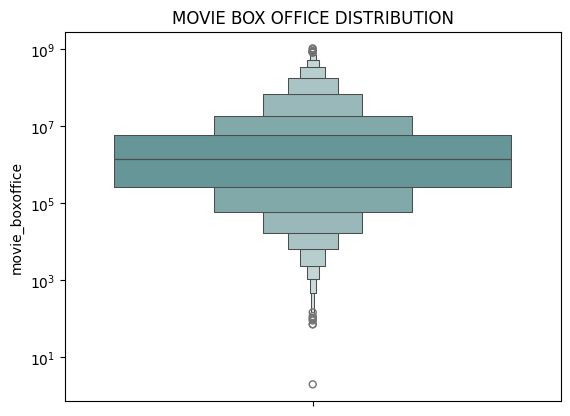

In [109]:
sns.boxenplot(merge.movie_boxoffice, color='cadetblue')
plt.title("MOVIE BOX OFFICE DISTRIBUTION")
plt.yscale('log')
plt.show()

#### MOVIE BUDGET

In [ ]:
# Attention, il y avait un problème de conversion des budgets non américains donc j'ai tout laissé tel quel
# Il faudrait peut-être les convertir via pandas & rescraper ces données en enlevant le nettoyage de cette variable dans les pipelines
# Supprimer les budgets inférieurs à un certain seuil?

In [96]:
merge.movie_budget.describe()

count    2.005000e+03
mean     2.099514e+07
std      6.171521e+07
min      1.000000e+00
25%      1.900000e+06
50%      5.800000e+06
75%      1.680000e+07
max      1.800000e+09
Name: movie_budget, dtype: float64

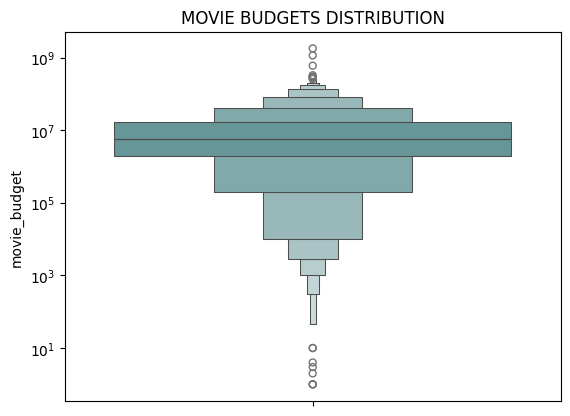

In [107]:
sns.boxenplot(merge.movie_budget, color='cadetblue')
plt.title("MOVIE BUDGETS DISTRIBUTION")
plt.yscale('log')
plt.show()

#### MOVIE CAST

In [110]:
# Que faire?

In [111]:
merge.movie_cast.describe()

count                               6079
unique                              6077
top       "Timmy DArnay"|Marine Hoepfner
freq                                   2
Name: movie_cast, dtype: object

#### MOVIE CATEGORIES

In [112]:
# Que faire?

In [113]:
merge.movie_categories.describe()

count      6127
unique      394
top       Drame
freq       1555
Name: movie_categories, dtype: object

#### MOVIE COUNTRIES

In [114]:
merge.movie_countries.describe()

count       6124
unique       924
top       France
freq        3150
Name: movie_countries, dtype: object

#### MOVIE DIRECTORS

In [115]:
merge.movie_director.describe()

count                  6111
unique                 3616
top       Jean-Pierre Mocky
freq                     25
Name: movie_director, dtype: object

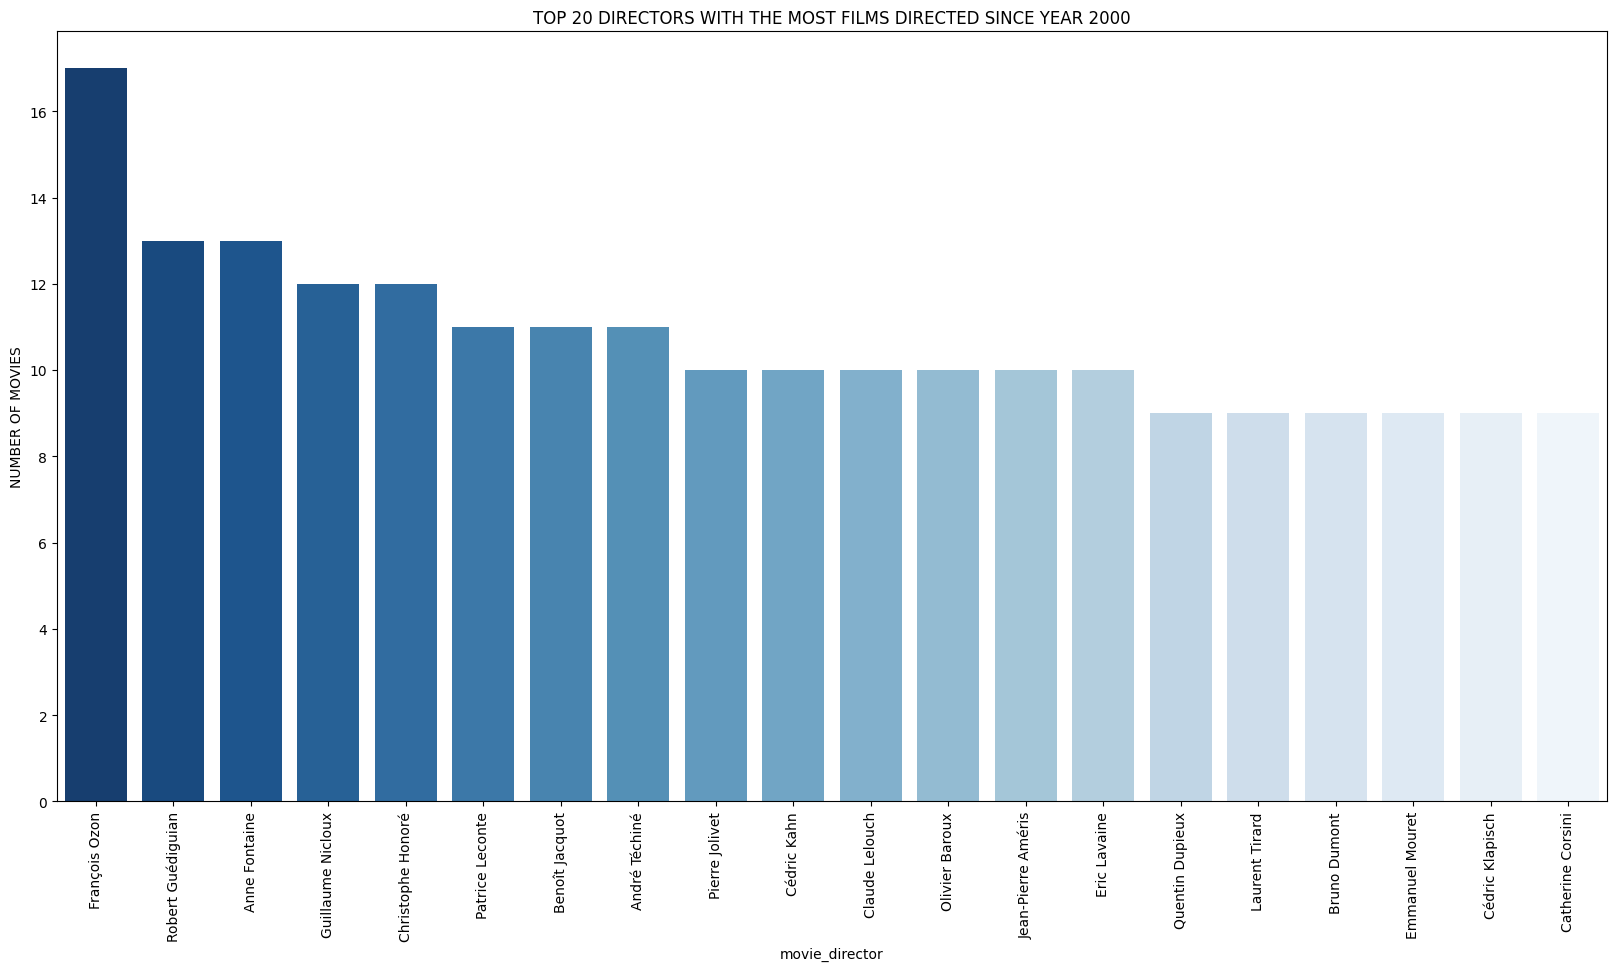

In [128]:
test = merge.groupby("movie_director").count().reset_index()
test = test.rename(columns={"movie_boxoffice": "Total"})
test_top = test.sort_values(by="Total", ascending=False).head(20)
test_top = test_top[["movie_director", "Total"]]
plt.figure(figsize=(20,10))
plt.title("TOP 20 DIRECTORS WITH THE MOST FILMS DIRECTED SINCE YEAR 2000")
sns.barplot(test_top, x='movie_director', y="Total", hue="movie_director", palette="Blues_r", legend=False)
plt.xticks(rotation='vertical')
plt.ylabel('NUMBER OF MOVIES')
plt.show()

## Bivariate Analysis